# Clasificación
El uso de Machine Learning en la agricultura es vital para optimizar
rendimientos, mejorar la sostenibilidad y minimizar riesgos. Esto es
particularmente relevante en Argentina, donde la agricultura es un pilar
económico. Saber qué tipo de cultivo es más adecuado para ciertas
condiciones del suelo y del clima puede tener un impacto significativo en
la productividad y la sostenibilidad.

Contenido_de_Nitrogeno: Proporción de contenido de nitrógeno en el suelo.

Contenido_de_Fosforo: Proporción de contenido de fósforo en el suelo.

Contenido_de_Potasio: Proporción de contenido de potasio en el suelo.

Temperatura_C: Temperatura en grados Celsius.

Humedad_Relativa: Humedad relativa en porcentaje.

Nivel_de_pH: Nivel de pH del suelo.

Precipitacion_mm: Cantidad de precipitación en milímetros.

Tipo_de_Cultivo: Tipo de cultivo recomendado en función de los parámetros anteriores.

# a. Análisis Exploratorio de Datos (EDA)
Para realizar un EDA exhaustivo del dataset, considere las siguientes
preguntas:
¿Cómo se distribuyen los valores en cada una de las variables?
¿Existen correlaciones entre las diferentes variables del suelo y los tipos
de cultivos?
¿Cómo varía la recomendación de cultivo según las condiciones del
suelo y el clima?
¿Existen valores atípicos o faltantes que deban ser tratados?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as  np

In [3]:
data = pd.read_csv("tipo_cultivo.csv")

In [4]:
data.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.columns

Index(['Unnamed: 0', 'Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

In [6]:
data = data.drop("Unnamed: 0", axis=1)

In [7]:
data.dtypes

Contenido_de_Nitrogeno      int64
Contenido_de_Fosforo        int64
Contenido_de_Potasio        int64
Temperatura_C             float64
Humedad_Relativa          float64
Nivel_de_pH               float64
Precipitacion_mm          float64
Tipo_de_Cultivo            object
dtype: object

In [8]:
data.isna().sum()

Contenido_de_Nitrogeno    0
Contenido_de_Fosforo      0
Contenido_de_Potasio      0
Temperatura_C             0
Humedad_Relativa          0
Nivel_de_pH               0
Precipitacion_mm          0
Tipo_de_Cultivo           0
dtype: int64

In [9]:
data.Tipo_de_Cultivo.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

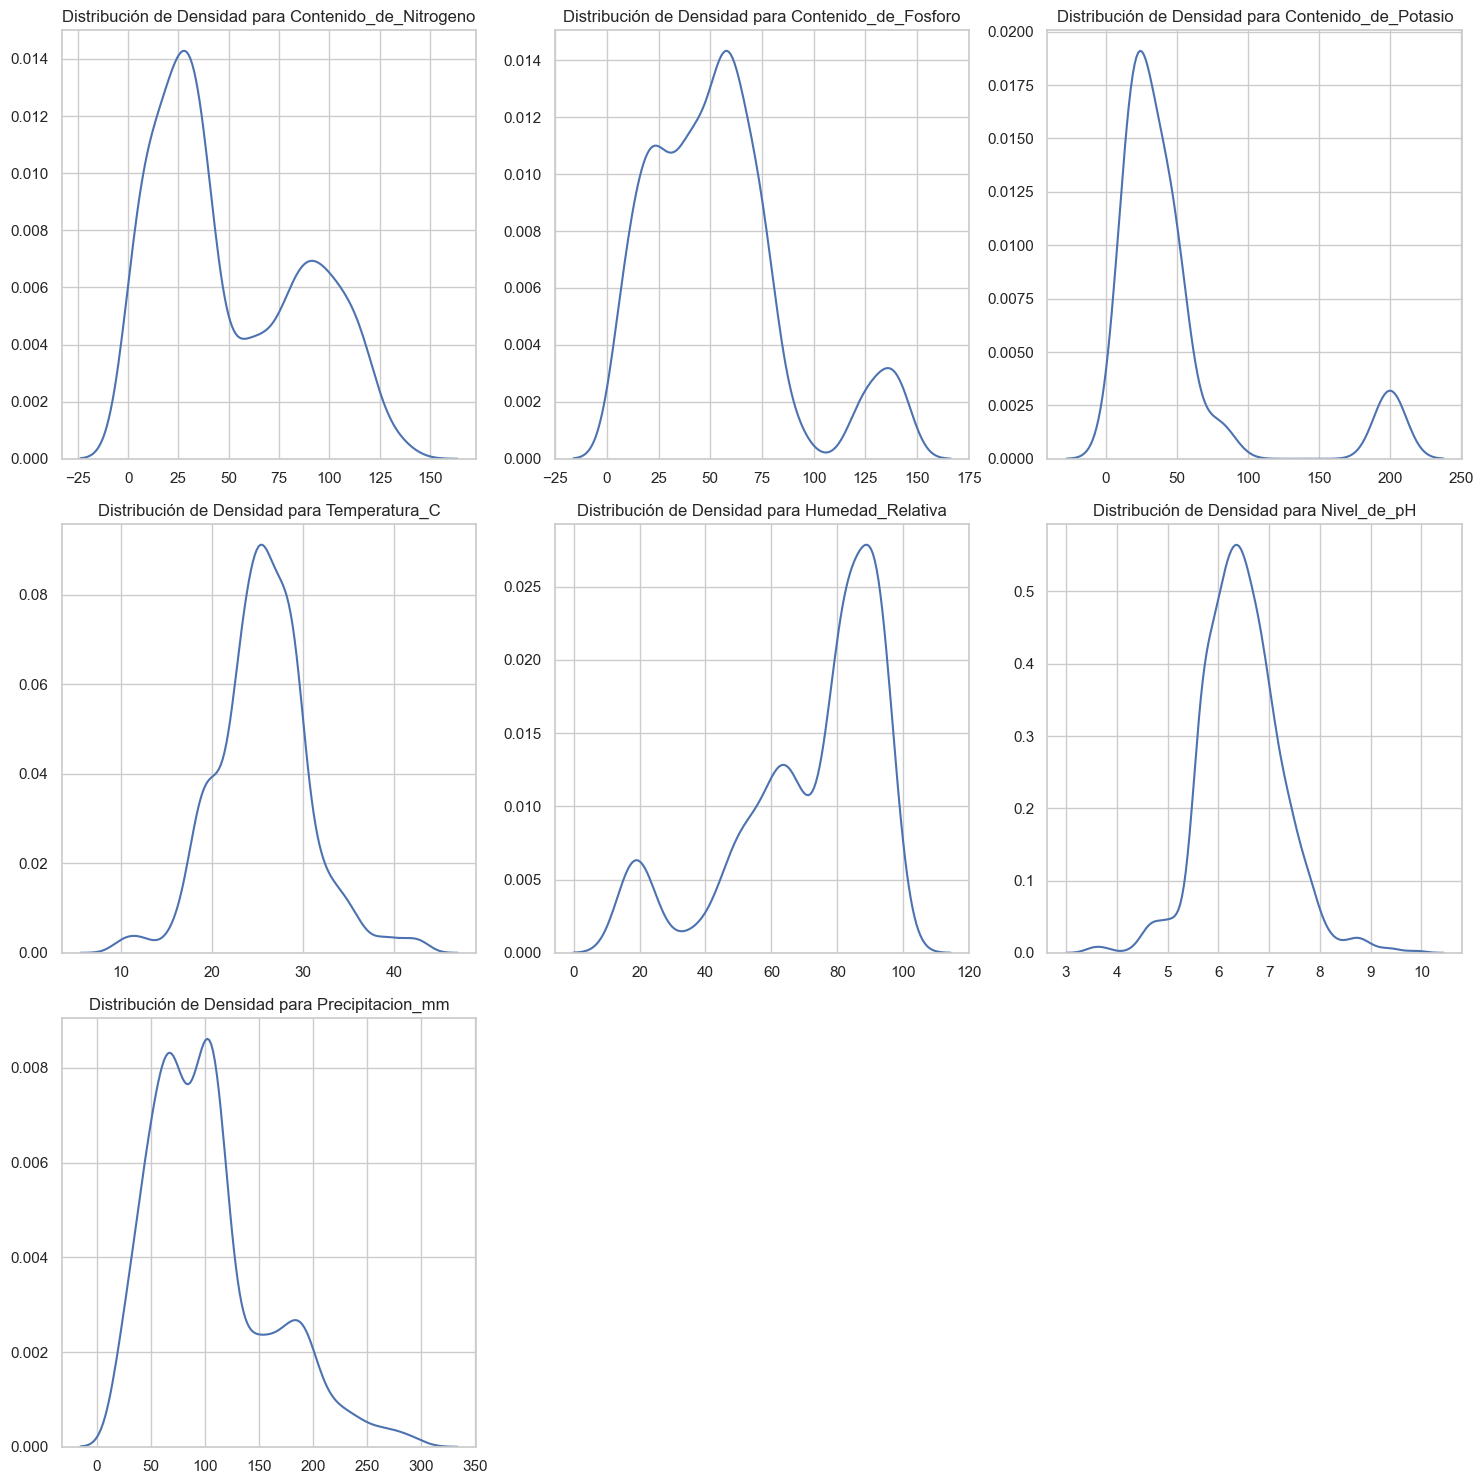

In [10]:
columnas_numericas = data.select_dtypes(include=['number']).columns

sns.set(style="whitegrid")

filas = len(columnas_numericas) // 3 + (len(columnas_numericas) % 3 > 0)
columnas = 3

fig, axes = plt.subplots(filas, columnas, figsize=(15, 5 * filas))

# Itera a través de las columnas numéricas y crea los gráficos KDE en subplots
for i, columna in enumerate(columnas_numericas):
    fila_actual = i // 3
    columna_actual = i % 3
    ax = axes[fila_actual, columna_actual]
    
    sns.kdeplot(data=data, x=columna, ax=ax)
    ax.set_title(f'Distribución de Densidad para {columna}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Elimina los subplots vacíos si hay menos de 3 gráficos en la última fila
if len(columnas_numericas) % 3 > 0:
    for i in range(len(columnas_numericas) % 3, 3):
        fig.delaxes(axes[-1, i])

plt.tight_layout()
plt.show()


La temperatura y el PH se distribuyen normal. El resto tiene al menos 2 picos en distintos valores, esto podria indicar distintos rangos característicos.

In [11]:
data.groupby("Tipo_de_Cultivo").mean()

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
Tipo_de_Cultivo,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


¿Existen valores atípicos o faltantes que deban ser tratados?


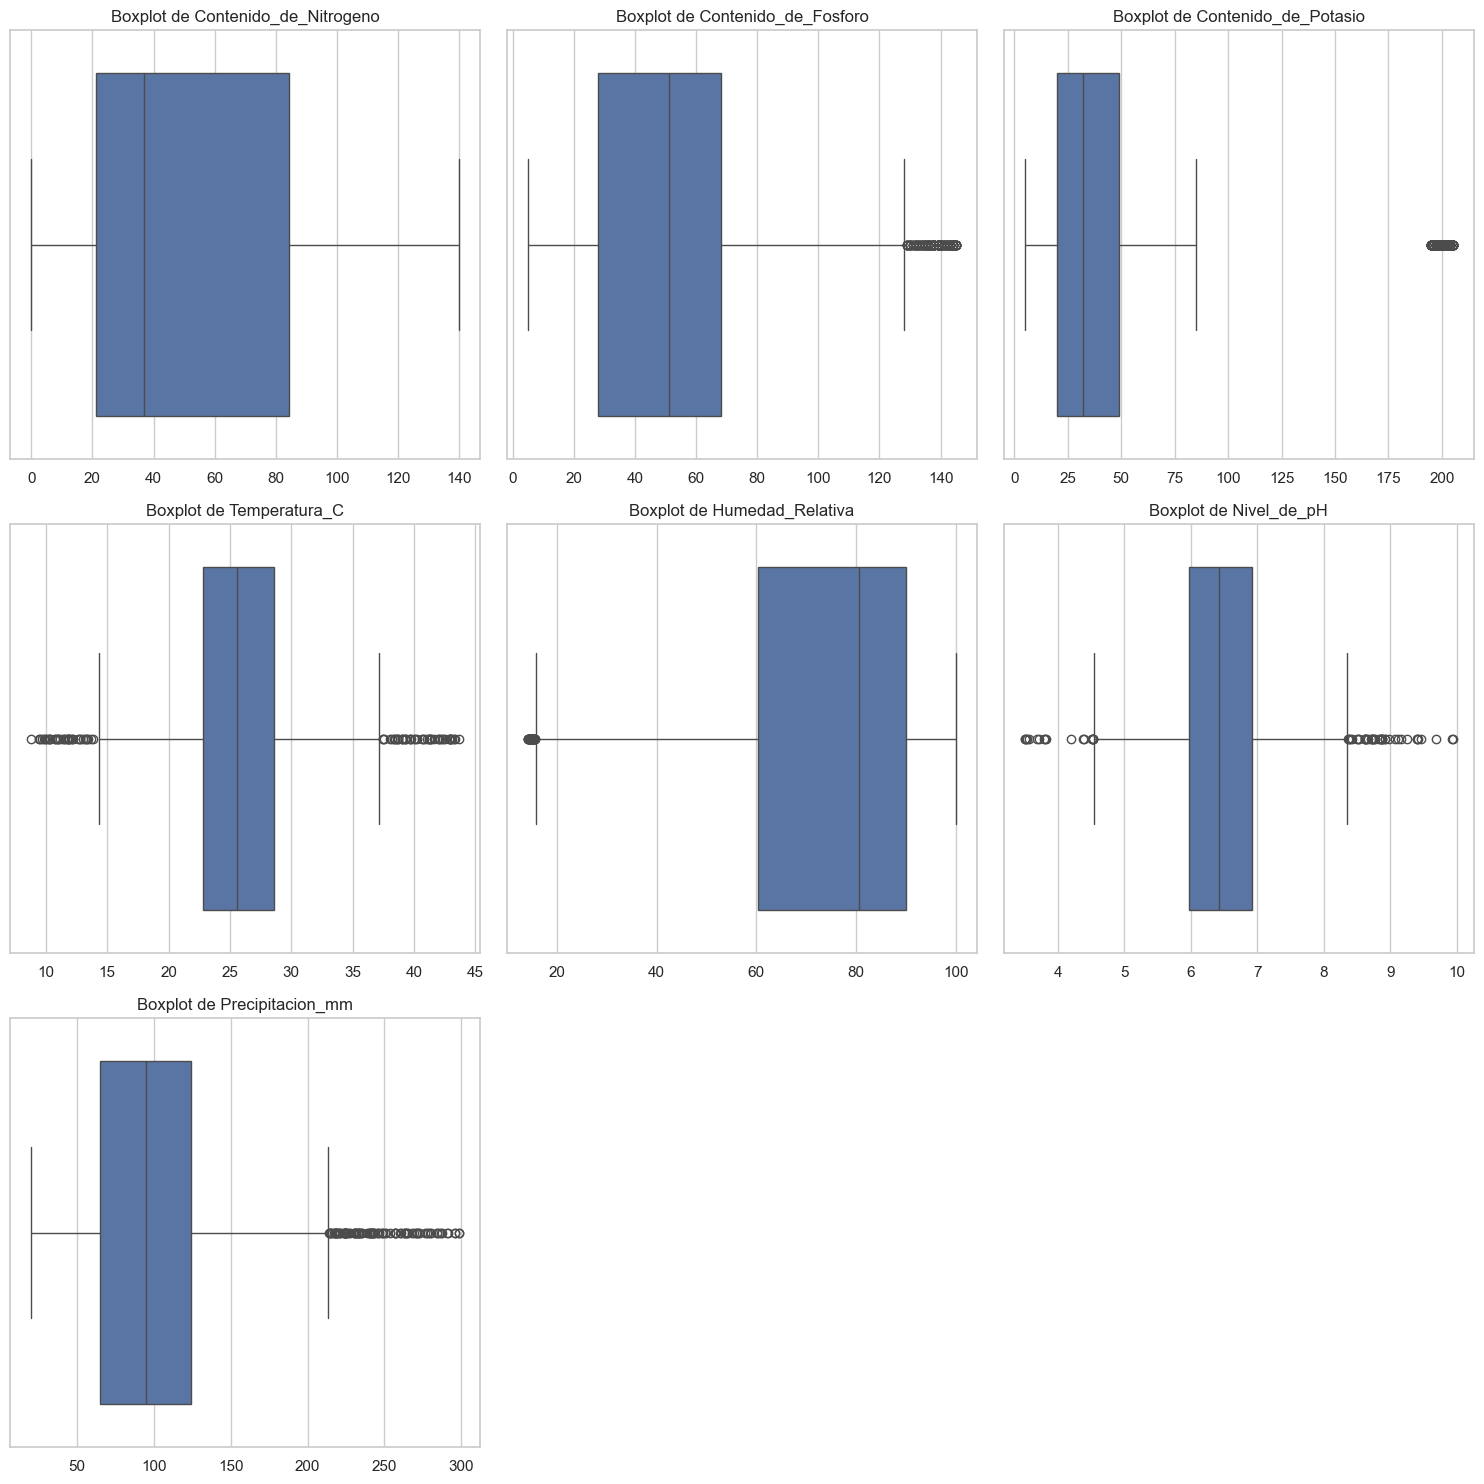

In [12]:
numeric_cols = data.select_dtypes(include=[float, int])

# Configura el tamaño de la figura y la cantidad de columnas en la disposición
num_plots = len(numeric_cols.columns)
cols_per_row = 3
num_rows = (num_plots // cols_per_row) + (num_plots % cols_per_row)

# Crea una disposición de subgráficos
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.ravel()

# Itera a través de las columnas numéricas y crea un boxplot para cada una
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Elimina los subgráficos vacíos si el número de columnas no es un múltiplo de cols_per_row
for i in range(num_plots, num_rows * cols_per_row):
    fig.delaxes(axes[i])

# Ajusta el espaciado y muestra los gráficos
plt.tight_layout()
plt.show()

No se consideran ouliers ya que siguen estando dentro de rangos lógicos.

<AxesSubplot: >

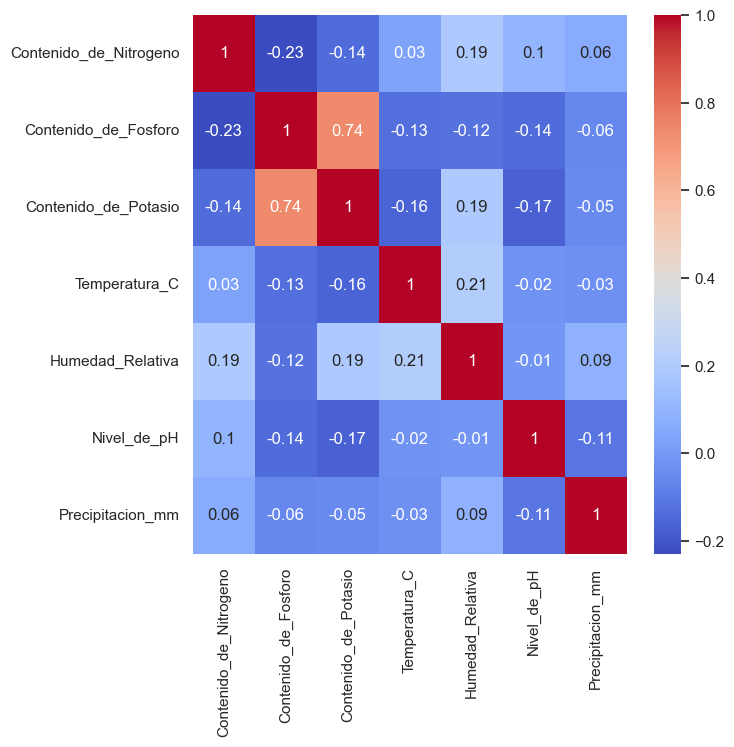

In [13]:
plt.figure(figsize = (7,7))
sns.heatmap(round(numeric_cols.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12})

Correlación positiva entre el contenido de fosforo y el contenido de potasio de los suelos.

¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?

In [14]:
data_corr = data.copy()

In [15]:
tipocultivo_ohe = OneHotEncoder(sparse=False)
tipocultivo_ohe.fit(data_corr[["Tipo_de_Cultivo"]])
tipocultivo_ohe.categories_

C:\Users\cvsob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [16]:
data_corr["apple"], data_corr["banana"] ,data_corr["blackgram"],data_corr["chickpea"],data_corr["coconut"],data_corr["coffee"],data_corr["cotton"],data_corr["grapes"], data_corr["jute"] ,data_corr["kidneybeans"],data_corr["lentil"],data_corr["maize"],data_corr["mango"],data_corr["mothbeans"],data_corr["mungbean"], data_corr["muskmelon"] ,data_corr["orange"],data_corr["papaya"],data_corr["pigeonpeas"],data_corr["pomegranate"],data_corr["rice"],data_corr["watermelon"] = tipocultivo_ohe.fit_transform(data_corr[["Tipo_de_Cultivo"]]).T

C:\Users\cvsob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
data_corr.drop(columns="Tipo_de_Cultivo", inplace=True)

<AxesSubplot: >

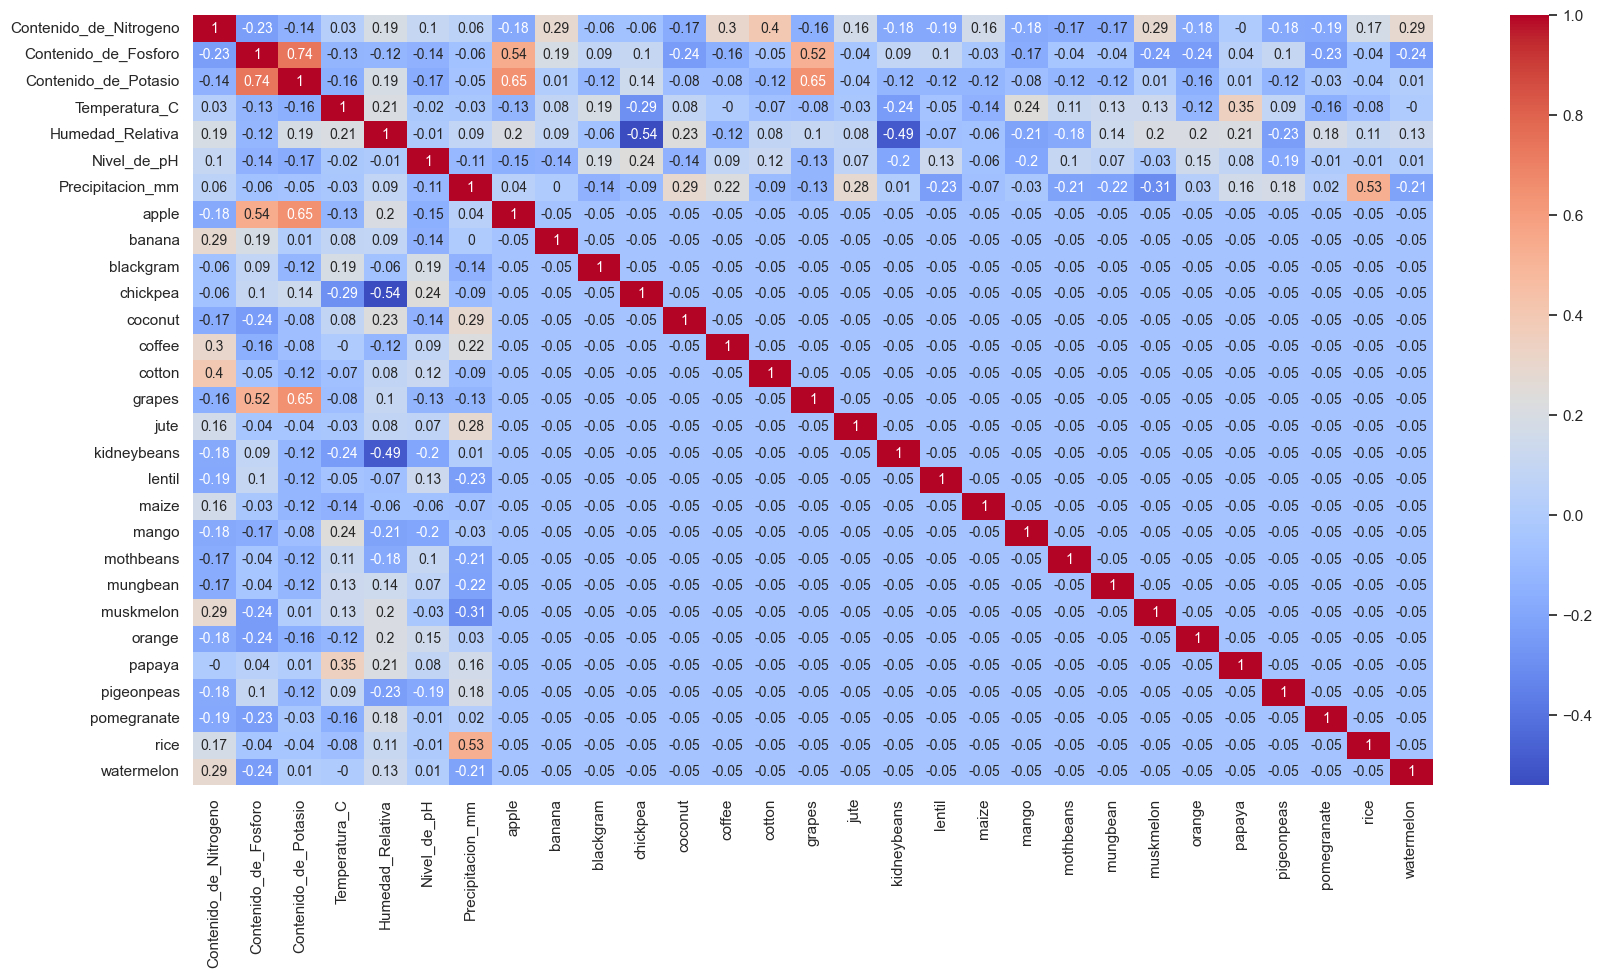

In [18]:
plt.figure(figsize = (20, 10))
sns.heatmap(round(data_corr.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size": 10})

¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?

    Suelos con alto contenido de nitrógeno 

    Recomendado: cotton, coffee, banana, watermelon. 

    Suelo con alto contenido de fósforo

    Recomendado: apple, grapes

    Suelo con bajo contenido de fósforo:

    Recomendados: coconut, muskmelon, orange, pomegranate, watermelon

    Suelo con alto contenido de potasio

    Recomendado: grapes, apple

    Suelo con pH ácido

    Recomendado: kidneybeans, mango

    Suelo con pH alcalino

    Recomendado: chickpea

    Climas con altas temperaturas:

    Recomendados: papaya, mango

    Climas fríos: 

    Recommendado: chickpea, kidneybeans

    Climas húmedos:

    Recomendado: apple, coconut, muskmelon, orange, papaya

    Climas secos:

    Recomendados: chickpea, kidneybeans, pingeonpeas, mango

    Climas con mucha lluvia:

    Recomendado: rice, jute, coffee, coconut

    Climas con poca lluvia:

    Recomendado: watermelon, muskmelon, mungbean, mothbean, lentil

# Machine learning

In [19]:
data.columns

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

In [20]:
data_modelos = data.copy()

In [21]:
data_modelos['id_cultivo'] = pd.factorize(data_modelos['Tipo_de_Cultivo'])[0]

In [22]:
X = data_modelos.drop(["id_cultivo","Tipo_de_Cultivo"], axis=1)  # DataFrame con características
y = data_modelos['id_cultivo']  # Serie con etiquetas

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31415)

### Regresión logística

In [24]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit(method="bfgs")
stats1=result.summary()

print(stats1)

         Current function value: 0.633686
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


C:\Users\cvsob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:             id_cultivo   No. Observations:                 1540
Model:                        MNLogit   Df Residuals:                     1372
Method:                           MLE   Df Model:                          147
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.7949
Time:                        23:39:58   Log-Likelihood:                -975.88
converged:                      False   LL-Null:                       -4756.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
          id_cultivo=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0079      2.853      0.003      0.998      -5.583       5.599
Contenido_de_Nitrogeno     0.0299      0.010      2.873      0.004       0.010       0.050
Cont

Accuracy: 0.843939393939394
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        34
           1       0.78      0.82      0.80        22
           2       1.00      1.00      1.00        25
           3       0.94      0.65      0.77        26
           4       0.76      0.94      0.84        31
           5       0.57      0.96      0.72        24
           6       0.84      1.00      0.92        38
           7       0.75      0.52      0.62        23
           8       1.00      0.78      0.88        32
           9       0.97      1.00      0.98        28
          10       0.97      1.00      0.98        30
          11       0.91      1.00      0.95        30
          12       0.89      1.00      0.94        32
          13       1.00      0.58      0.73        33
          14       0.72      1.00      0.84        36
          15       1.00      0.83      0.91        29
          16       0.91      1.00      0.95        30

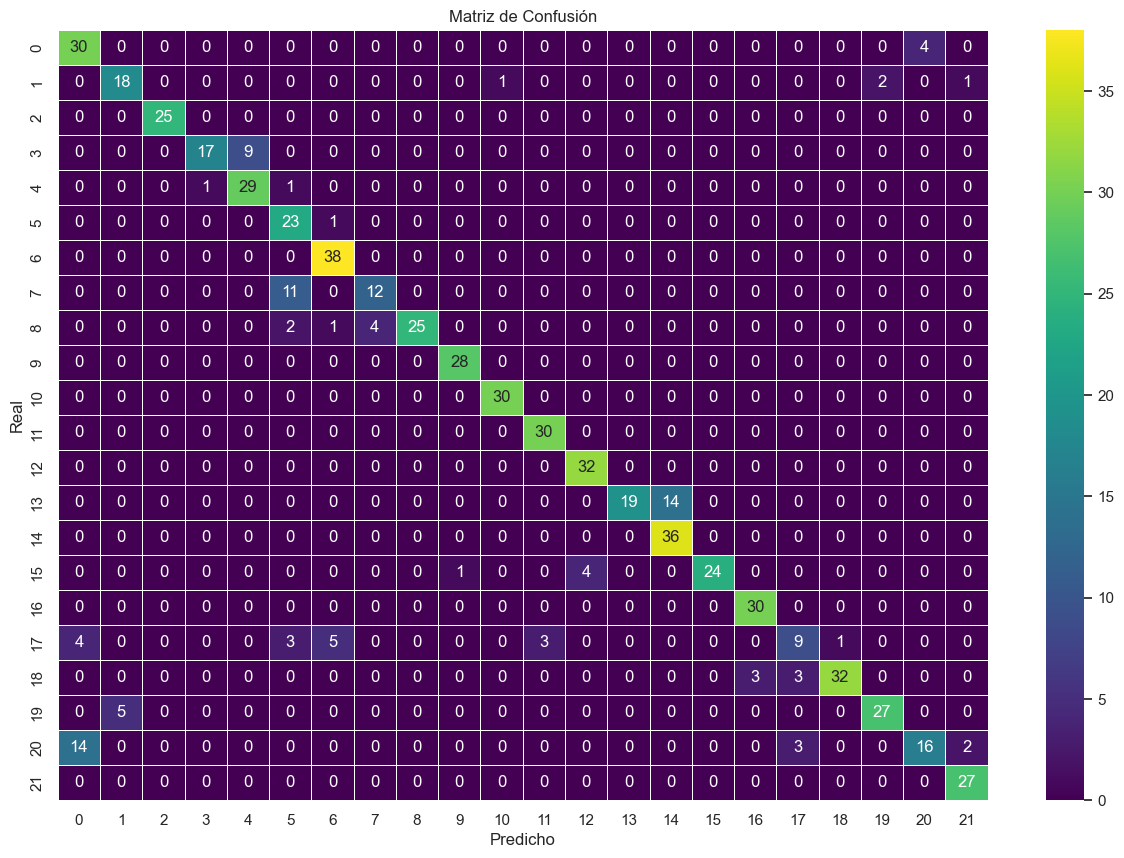

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as  np

y_pred = result.predict(sm.add_constant(X_test))
y_pred_labels = np.argmax(y_pred.values, axis=1)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')

# Display other classification metrics
print(classification_report(y_test, y_pred_labels))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix:')
# print(cm)

# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

El modelo de regresión logística tiene un accuracy general del 84.4%, lo que indica que acierta en la clasificación de las etiquetas el 84.4% de las veces, lo cual es bastante bueno.

Precisión se refiere a la proporción de predicciones positivas que fueron correctas. El modelo tiene un 86% de precisión, significa que el 86% de las predicciones que hizo como fueron realmente correctas.

Recall mide la proporción de casos positivos reales que el modelo predijo correctamente. El modelo tiene un 84% de recall, indica que el modelo identificó correctamente el 84% de todos los casos reales.

Algunas clases tienen una precisión y recall bastante altos, como las clases 2, 9, 10, 11, 12, 14, 16, y 21, todas con valores superiores al 90% en ambas métricas. Esto significa que el modelo clasifica con alta precisión y logra recuperar la mayoría de las instancias relevantes para esas clases.

Por otro lado, hay clases donde la precisión o el recall son más bajos, como las clases 0, 5, 7, 13, y 20. Esto indica que el modelo puede estar teniendo dificultades para clasificar correctamente esas clases específicas. Por ejemplo, para la clase 13, la precisión es perfecta (100%) pero el recall es bajo (58%), lo que sugiere que aunque cuando predice esta clase suele ser correcta, puede estar dejando pasar algunas instancias de esa clase. Esto se ve claramente en la matriz, todos los valores que predijo que eran 13 son realmente 13 pero no todos los 13 reales fueron bien predichos, muchos los confundió con el tipo de cultivo 14.

### Arbol de decisión

Puntuación de validación cruzada: [0.93636364 0.90909091 0.91818182 0.85909091 0.93636364]
Precisión en entrenamiento = 0.938961038961039
Precisión en pruebas = 0.9242424242424242


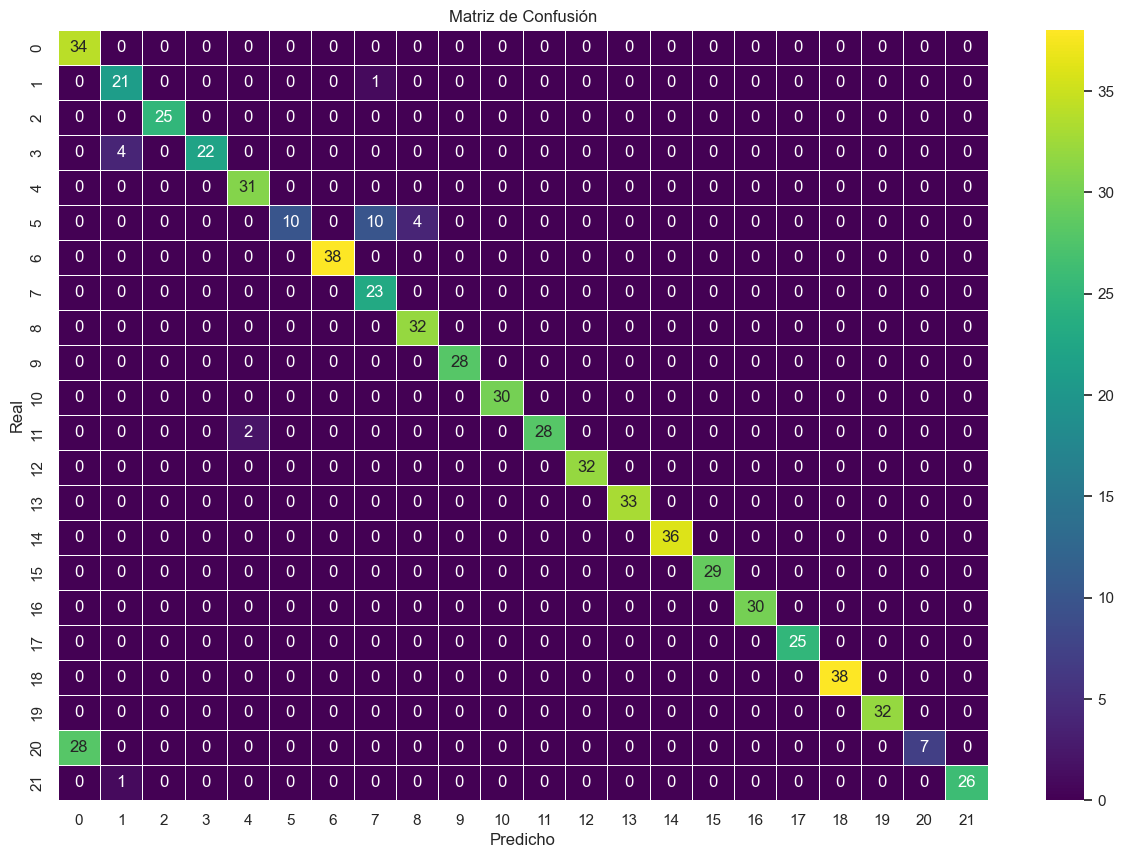

In [26]:
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5)
decision_tree_model.fit(X_train, y_train)
# Validación cruzada
score = cross_val_score(decision_tree_model, X, y, cv=5)
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)
# Matriz de confusión
y_pred = decision_tree_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()


In [27]:
data_modelos[["id_cultivo", "Tipo_de_Cultivo"]].drop_duplicates()

,id_cultivo,Tipo_de_Cultivo
0,0,rice
100,1,maize
200,2,chickpea
300,3,kidneybeans
400,4,pigeonpeas
500,5,mothbeans
600,6,mungbean
700,7,blackgram
800,8,lentil
900,9,pomegranate


La diagonal de una matriz de confusión representa los casos en los que el algoritmo predijo correctamente el cultivo. 
Los desvios de la diagonal representan los casos en los que el algoritmo predijo incorrectamente el cultivo

Podemos ver que el árbol de decisión funciona bastante bien, excepto para el yute que lo confunde mucho con arroz y el mothbeans con blackgram. Comete algunos errores más pero ninguno tan relevante.Podemos ver que algunos los predice a la perfección y otros con errores. Cantidad de valores mal predichos: 49

Los valores de la puntuación de validación cruzada son [0.93636364 0.90909091 0.91818182 0.85909091 0.93636364]. Estos números representan la precisión promedio obtenida al dividir los datos en diferentes subconjuntos de entrenamiento y prueba utilizando validación cruzada.

La validación cruzada suele proporcionar una estimación más confiable del rendimiento del modelo al considerar múltiples divisiones de los datos. En este caso, los valores son bastante consistentes, con un promedio alrededor del 91.18%. Esto respalda la idea de que el modelo tiene un buen rendimiento.

La precisión en entrenamiento es del 93.89%, lo que sugiere que el modelo tiene un buen rendimiento al predecir los datos que ya ha visto durante el entrenamiento.

La precisión en pruebas es del 92.42%, lo que indica un buen rendimiento del modelo en datos que no ha visto durante el entrenamiento. Esta precisión cercana a la del entrenamiento sugiere que el modelo generaliza bien a nuevos datos, lo cual es positivo.

La diferencia entre la precisión en entrenamiento y pruebas no es muy alta, lo que sugiere que el modelo no está sufriendo un sobreajuste significativo (overfitting). Un sobreajuste se da cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.

### Comparación de modelos

El modelo del árbol de decisión tiene una precisión general más alta, del 92,42 % frente al 84,39 % del modelo de regresión logística. Esto significa que el modelo del árbol tiene un mejor rendimiento en promedio en todas las categorías de cultivos.